In [3]:
# imports and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('desktop/noshowappointments-kagglev2-may-2016.csv')
schema_df = pd.read_csv('desktop/noshowappointments-kagglev2-may-2016.csv')
df.columns=df.columns.str.strip().str.lower().str.replace('-','_')
pd.options.display.float_format = '{:.0f}'.format

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.groupby('no_show').count()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,,,,,,,,
No,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [262]:
# get counts for each rating and color
counts1 = df.groupby(['gender']).count()['no_show']

In [263]:
counts1

gender
F    71840
M    38687
Name: no_show, dtype: int64

In [257]:
totals = df.groupby(['no_show']).count()['gender']

In [258]:
totals

no_show
No     88208
Yes    22319
Name: gender, dtype: int64

In [119]:
noshow = df['no_show'] == 'Yes'

In [198]:
noshow

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: no_show, Length: 110527, dtype: bool

In [123]:
showup = df['no_show'] == 'No'

In [199]:
showup

0         True
1         True
2         True
3         True
4         True
          ... 
110522    True
110523    True
110524    True
110525    True
110526    True
Name: no_show, Length: 110527, dtype: bool

In [200]:
counts.nunique()

patientid         4
appointmentid     4
scheduledday      4
appointmentday    4
age               4
neighbourhood     4
scholarship       4
hipertension      4
diabetes          4
alcoholism        4
handcap           4
sms_received      4
dtype: int64

Text(0, 0.5, 'Age')

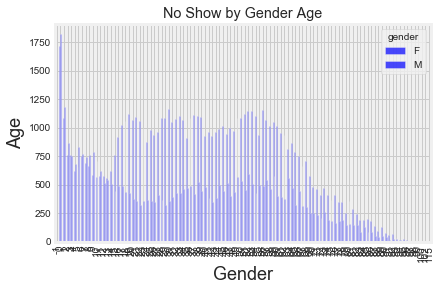

In [201]:
counts = gender
gender.plot(kind='bar', title='No Show by Gender Age', color='b', alpha=.7)
                 
plt.xlabel("No show" and "Gender", fontsize=18)
plt.ylabel("Age", fontsize=18)

In [202]:
df.groupby(['gender','no_show','sms_received']).count().head(50)

patientid  appointmentid  scheduledday  \
gender no_show sms_received                                           
F      No      0                 39764          39764         39764   
               1                 17482          17482         17482   
       Yes     0                  7874           7874          7874   
               1                  6720           6720          6720   
M      No      0                 22746          22746         22746   
               1                  8216           8216          8216   
       Yes     0                  4661           4661          4661   
               1                  3064           3064          3064   

                             appointmentday    age  neighbourhood  \
gender no_show sms_received                                         
F      No      0                      39764  39764          39764   
               1                      17482  17482          17482   
       Yes     0                       7874   7874           7874   
               1                       6720   6720           6720   
M      No      0                      22746  22746          22746   
               1                       8216   8216           8216   
       Yes     0                       4661   4661           4661   
               1                       3064   3064           3064   

                             scholarship  hipertension  diabetes  alcoholism  \
gender no_show sms_received                                                    
F      No      0                   39764         39764     39764       39764   
               1                   17482         17482     17482       17482   
       Yes     0                    7874          7874      7874        7874   
               1                    6720          6720      6720        6720   
M      No      0                   22746         22746     22746       22746   
               1                    8216          8216      8216        8216   
       Yes     0                    4661          4661      4661        4661   
               1                    3064          3064      3064        3064   

                             handcap  
gender no_show sms_received           
F      No      0               39764  
               1               17482  
       Yes     0                7874  
               1                6720  
M      No      0               22746  
               1                8216  
       Yes     0                4661  
               1                3064

Text(0, 0.5, 'Proportion')

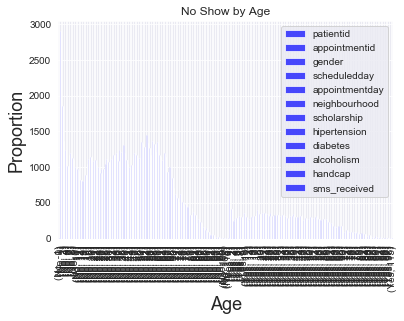

In [36]:
showup = gender
gender.plot(kind='bar', title='No Show by Gender Age', color='b', alpha=.7)
                 
plt.xlabel("No show" and "Gender", fontsize=18)
plt.ylabel("Age", fontsize=18)

In [203]:
df.groupby(['gender', 'no_show'], as_index=False)['age'].mean()

,gender,no_show,age
0,F,No,40
1,F,Yes,36
2,M,No,34
3,M,Yes,31


In [76]:
df.groupby('age').mean()

,patientid,appointmentid,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
age,,,,,,,,
-1,465943158731293,5775010,0,0,0,0,0,0
0,153902715980394,5671375,0,0,0,0,0,0
1,158022368331540,5678714,0,0,0,0,0,0
2,143777271922369,5681502,0,0,0,0,0,0
3,144770258072796,5678064,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
98,92138566531150,5564189,0,1,0,0,0,0
99,36615771819,5775674,0,1,1,0,0,0
100,18913988303052,5721921,0,0,0,0,0,0


In [77]:
df[df['age']<=0] = df['age'].mean()

In [78]:
df.groupby('age').mean()

,patientid,appointmentid,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
age,,,,,,,,
1,158022368331540,5678714,0,0,0,0,0,0
2,143777271922369,5681502,0,0,0,0,0,0
3,144770258072796,5678064,0,0,0,0,0,0
4,151247308218310,5677033,0,0,0,0,0,0
5,140434748423721,5674069,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
98,92138566531150,5564189,0,1,0,0,0,0
99,36615771819,5775674,0,1,1,0,0,0
100,18913988303052,5721921,0,0,0,0,0,0


In [79]:
df['age'].apply(np.mean)

0        62
1        56
2        62
3         8
4        56
         ..
110522   56
110523   51
110524   21
110525   38
110526   54
Name: age, Length: 110527, dtype: float64

In [93]:
a = df[['age', 'gender']]
b = a.groupby(['age', 'gender']).agg({'age' : 'count'})
b

age
age gender      
1   F       1088
    M       1185
2   F        757
    M        861
3   F        764
...          ...
99  F          1
100 F          2
    M          2
102 F          2
115 F          5

[202 rows x 1 columns]

In [83]:
df.patientid.nunique() 

60271

In [85]:
df.age.nunique()

103

In [86]:
df.gender.nunique()

3

In [92]:
(make_barchart(total_female_missed_aday_per, total_male_missed_aday_per, 'pink', 'blue', 'Female', 'Male',.25, [0,50], '% missed',  'day_order, '% missed by gender on appointment day')

SyntaxError: invalid syntax (<ipython-input-92-adf00401f9bd>, line 1)

In [94]:
df.groupby(['neighbourhood', 'no_show'], as_index=False)['age'].mean()

,neighbourhood,no_show,age
0,37,37,37
1,AEROPORTO,No,55
2,AEROPORTO,Yes,37
3,ANDORINHAS,No,38
4,ANDORINHAS,Yes,36
...,...,...,...
156,TABUAZEIRO,Yes,33
157,UNIVERSITÁRIO,No,43
158,UNIVERSITÁRIO,Yes,40
159,VILA RUBIM,No,47


In [301]:
df.groupby(['gender', 'neighbourhood','sms_received','no_show'], as_index=True)['age'].mean()

gender  neighbourhood  sms_received  no_show
F       AEROPORTO      0             No        54
                                     Yes       37
        ANDORINHAS     0             No        38
                                     Yes       38
                       1             No        39
                                               ..
M       UNIVERSITÁRIO  1             Yes       34
        VILA RUBIM     0             No        40
                                     Yes       36
                       1             No        41
                                     Yes       35
Name: age, Length: 624, dtype: float64

In [103]:
'showup'
range_df = pd.DataFrame()
range_df['age'] = range(100)
men = range_df.age.apply(lambda x: len(df[(df.age == x) & (df.gender == 'M')]))
women = range_df.age.apply(lambda x: len(df[(df.age == x) & (df.gender == 'F')]))
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'r')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.title('Women visit the doctor more often')

AttributeError: 'Series' object has no attribute 'age'

In [291]:
df.groupby(['neighbourhood', 'sms_received'], as_index=False)['gender'].mean()


DataError: No numeric types to aggregate

In [142]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [143]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [144]:
df.groupby(['gender', 'no_show'] )['no_show'].count().unstack('gender')

gender,F,M
no_show,,
No,57246,30962
Yes,14594,7725


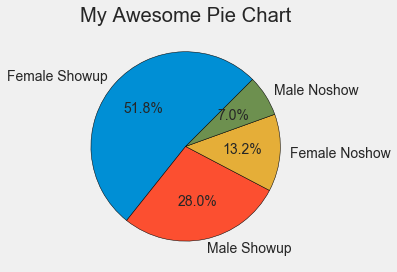

In [157]:
plt.style.use("fivethirtyeight")
              
slices = [57246,30962,14594,7725] 
labels = ['Female Showup', 'Male Showup', 'Female Noshow', 'Male Noshow']
explode = [1,0,0,0]

plt.pie(slices, labels=labels,startangle=45,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
              
plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()            
             

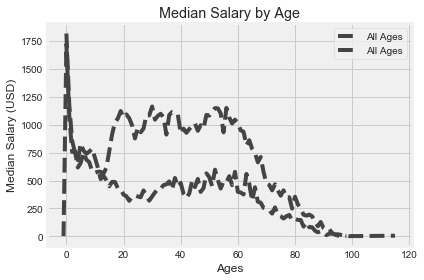

In [189]:
ages = df['age']
gender = df.groupby(['gender', 'age'] )['no_show'].count().unstack('gender')
py_salaries = df['no_show']
js_salaries = df['sms_received']

plt.plot(gender, color='#444444',
         linestyle='--', label='All Ages')

#plt.plot(ages, js_salaries, label='SMS')


#overall_median = 57287


#plt.fill_between(ages, py_salaries, overall_median,
                 #where=(py_salaries > overal_median),
                 #Interpolate=True,color='red', alpha=0.25)

#plt.fill_between(ages, py_salaries, overall_median,
                 #where=(py_salaries <= overal_median),
                 #Interpolate=True, alpha=0.25)

plt.legend()

plt.title('Median Salary by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

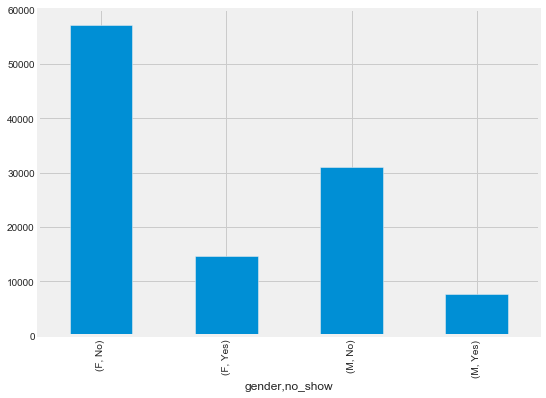

In [220]:
df.groupby(['gender', 'no_show'] )['no_show'].count().plot.bar(figsize=(8, 6));

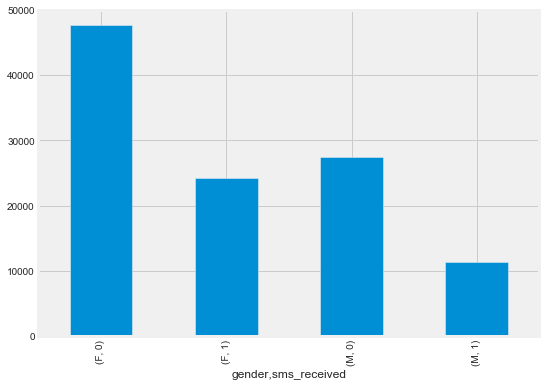

In [240]:
df.groupby(['gender', 'sms_received'] )['sms_received'].count().plot.bar(figsize=(8, 6));

In [214]:
# get counts for each rating and color
gen_now_show = df.groupby(['no_show', 'age']).count['gender']

TypeError: 'method' object is not subscriptable

In [212]:
gen_now_show

patientid  appointmentid  scheduledday  appointmentday    age  \
no_show gender                                                                  
No      F           57246          57246         57246           57246  57246   
        M           30962          30962         30962           30962  30962   
Yes     F           14594          14594         14594           14594  14594   
        M            7725           7725          7725            7725   7725   

                neighbourhood  scholarship  hipertension  diabetes  \
no_show gender                                                       
No      F               57246        57246         57246     57246   
        M               30962        30962         30962     30962   
Yes     F               14594        14594         14594     14594   
        M                7725         7725          7725      7725   

                alcoholism  handcap  sms_received  
no_show gender                                     
No      F            57246    57246         57246  
        M            30962    30962         30962  
Yes     F            14594    14594         14594  
        M             7725     7725          7725

<BarContainer object of 4 artists>

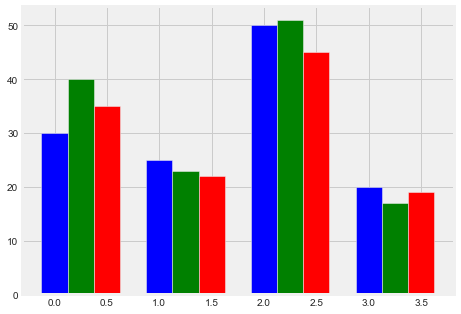

In [221]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

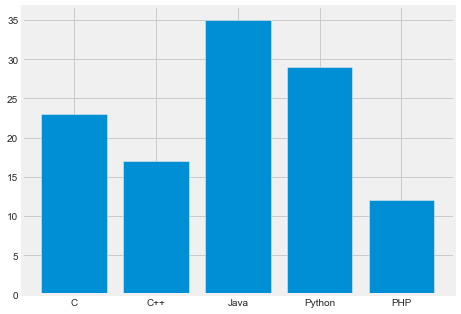

In [222]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

In [230]:
df.loc[df['no_show'] == 'Yes']


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7542951368435,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,14794966191172,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,622257462899397,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,513364984676544,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,645634214296344,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,85442954737999,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,645634214296344,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [229]:
df.loc[df['gender'] != 'Yes']

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


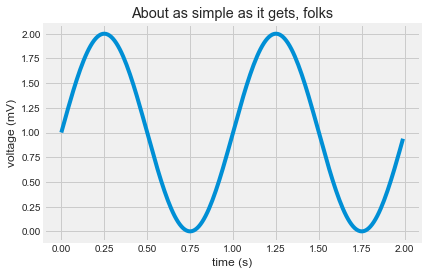

In [236]:
t = np.arange(0.0, 2.0, 0.01 )
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()

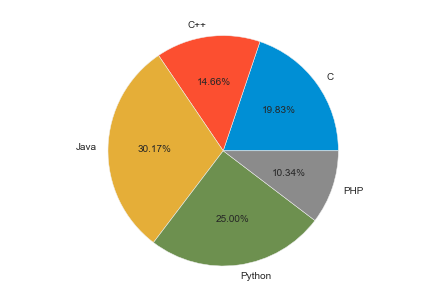

In [237]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

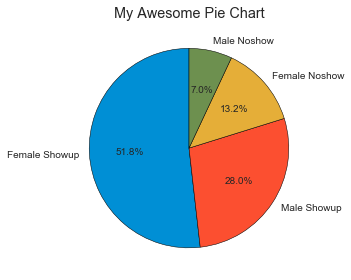

In [239]:
        
slices = [57246,30962,14594,7725] 
labels = ['Female Showup', 'Male Showup', 'Female Noshow', 'Male Noshow']
explode = [1,0,0,0]

plt.pie(slices, labels=labels,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
              
plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()       

In [293]:
test_df = df.groupby(['gender', 'sms_received'])['sms_received'].count().reset_index(name = 'SMS_count')
sns.barplot(x = 'gender', y = 'SMS_count', hue = 'sms_received', data = test_df, autopct='%1.1f%%,)
plt.xlabel('Gender')
plt.ylabel('SMS Count')
plt.title('Gender Count by SMS Recieved')

SyntaxError: EOL while scanning string literal (<ipython-input-293-f0d3070ab56f>, line 2)

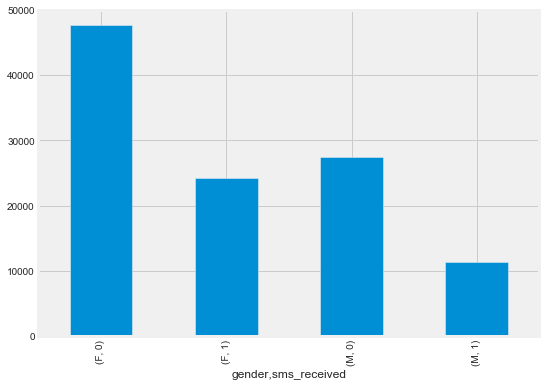

In [245]:
df.groupby(['gender', 'sms_received'] )['sms_received'].count().plot.bar(figsize=(8, 6));

Text(0.5, 1.0, 'Gender Count by Showup Noshow')

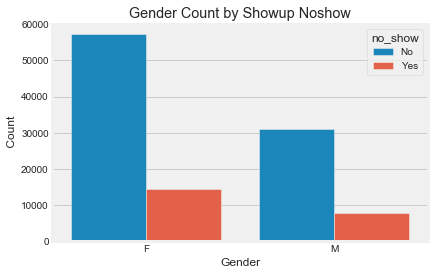

In [284]:
test_df = df.groupby(['gender', 'no_show'])['no_show'].count().reset_index(name = 'Noshow_count')
sns.barplot(x = 'gender', y = 'Noshow_count', hue = 'no_show', data = test_df)
plt.xlabel('Gender')
plt.ylabel(' Count')
plt.title('Gender Count by Showup Noshow')

Text(0.5, 1.0, 'AGE Count by Showup Noshow')

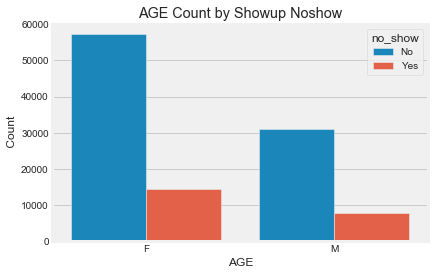

In [288]:
test_df = df.groupby(['gender', 'no_show'])['no_show'].count().reset_index(name = 'Noshow_count')
sns.barplot(x = 'gender', y = 'Noshow_count', hue = 'no_show', data = test_df)
plt.xlabel('AGE')
plt.ylabel(' Count')
plt.title('AGE Count by Showup Noshow')

Text(0.5, 1.0, 'AGE Count by Showup Noshow')

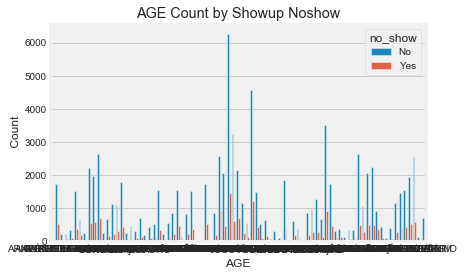

In [289]:
test_df = df.groupby(['neighbourhood', 'no_show'])['no_show'].count().reset_index(name = 'Noshow_count')
sns.barplot(x = 'neighbourhood', y = 'Noshow_count', hue = 'no_show', data = test_df)
plt.xlabel('AGE')
plt.ylabel(' Count')
plt.title('AGE Count by Showup Noshow')

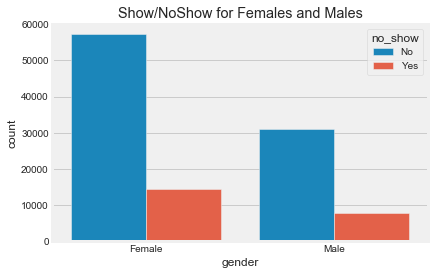

In [294]:
import seaborn as sns
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [6]:
df.groupby(['gender', 'neighbourhood','sms_received','no_show'], as_index=True)['age'].mean()

gender  neighbourhood  sms_received  no_show
F       AEROPORTO      0             No        54
                                     Yes       37
        ANDORINHAS     0             No        38
                                     Yes       38
                       1             No        39
                                               ..
M       UNIVERSITÁRIO  1             Yes       34
        VILA RUBIM     0             No        40
                                     Yes       36
                       1             No        41
                                     Yes       35
Name: age, Length: 624, dtype: float64